In [ ]:
import sys
sys.path.append("../")

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from utilities.result_utilities import get_filepath, extract_stats

In [10]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["cm"],
})


In [11]:
dura = 'shorter'
path = f'../{dura}/{dura}_losses'
# path = '../test'

In [12]:
# model_type = ['NNnph','NNnph']
model_type = ['Coxph','NNph','NNnph']
model_label = {'Coxph' : 'Linear CoxPH', 'NNph' : 'NN CoxPH', 'NNnph' : 'NN LogHaz'}
index_dict = {'Coxph' : 0, 'NNph' : 9, 'NNnph' : 18}

case = ['iid','noniid']
# case = ['noniid','noniid']

local_epochs = 1
what = 'local'
flatten = False

In [13]:
files = get_filepath(dura)
indiv_rounds, avg_rounds, std_rounds, indiv_concordances, avg_concordances, std_concordances, indiv_briers, avg_briers, std_briers = extract_stats(files)
len(avg_rounds)

27

48.4
Coxph iid
27.4
NNph iid
25.0
NNnph iid
10.8
Coxph noniid
12.0
NNph noniid
3.4
NNnph noniid


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


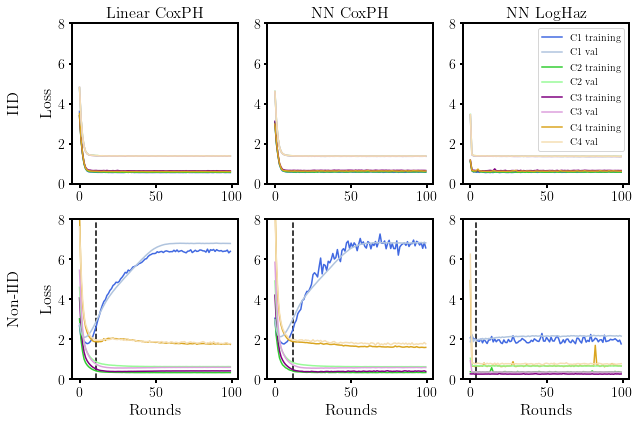

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(9,6))    

ax0label = ax[0][0].set_ylabel('IID \n \n Loss', fontsize=16)
ax1label = ax[1][0].set_ylabel('Non-IID \n \n Loss', fontsize=16)



for k, row in enumerate(ax):
    for j, col in enumerate(row):
        for axis in ['top','bottom','left','right']:
            col.spines[axis].set_linewidth(2)
        # col.set_title(f'{model_type[j]},{case[k]}')

        idx = index_dict[model_type[j]]
        adj = 1
        if case[k] == 'noniid':
            adj = 5 
        print(avg_rounds[idx+adj])
        if k == 1:
            col.axvline(x=avg_rounds[idx+adj], linestyle='dashed',color='black')

        print(model_type[j],case[k])
        filename = f'{path}/{what}_val_loss_M{model_type[j]}C{case[k]}L{local_epochs}.npy'
        losses = np.load(filename)
        if flatten:
            mean = losses.mean(axis=0).mean(axis=0)
            std = losses.std(axis=0).mean(axis=0)
        else:
            mean = losses.mean(axis=0)
            std = losses.std(axis=0)
        color=['royalblue','limegreen','purple','goldenrod']
        lines = []
        if what == 'local' and not flatten:
            for i,m in enumerate(mean):
                line, = col.plot(range(100),m, color=color[i])
                lines.append(line)
                col.fill_between(range(100), m - std[i], m + std[i], alpha=0, color=color[i])
        else:
            col.plot(range(100),mean, color=color[0])
            col.fill_between(range(100), mean - std, mean + std, alpha=0.5, color=color[0])

        # plt.plot(mean, range(100))

        # plt.fill_between(range(100), mean - std, mean + std)
        filename = f'{path}/{what}_train_loss_M{model_type[j]}C{case[k]}L{local_epochs}.npy'
        losses = np.load(filename)

        if flatten:
            mean = losses.mean(axis=0).mean(axis=0)
            std = losses.std(axis=0).mean(axis=0)
        else:
            mean = losses.mean(axis=0)
            std = losses.std(axis=0)
            
        color=['lightsteelblue','palegreen','plum','wheat']
        if what == 'local' and not flatten:
            for i,m in enumerate(mean):
                line, = col.plot(range(100),m, color[i])
                lines.append(line)
                col.fill_between(range(100), m - std[i], m + std[i], alpha=0, color=color[i])
        else:
            col.plot(range(100),mean, color[0])
            col.fill_between(range(100), mean - std, mean + std, alpha=0.5, color=color[0])

        col.tick_params(axis='x', labelsize=14)
        col.tick_params(axis='y', labelsize=14)

        # col.set_xticklabels([i * 25 for i in range(3)],fontsize=14)
        # col.set_yticklabels(fontsize=14)
        col.xaxis.set_tick_params(width=2)
        col.yaxis.set_tick_params(width=2)

        x1,x2,y1,y2 = col.axis()  
        col.axis((x1,x2,0,8))
        if k == 0:
            col.set_title(model_label[model_type[j]], fontsize=16)
        if k == 0 and j == 2:
            interleave = []
            for i in range(len(lines)//2):
                interleave.append(lines[i])
                interleave.append(lines[i+len(lines)//2])
                # legend = ['C1 training', 'C2 training','C3 training','C4 training','C1 val', 'C2 val','C3 val','C4 val']
                legend = ['C1 training','C1 val', 'C2 training','C2 val', 'C3 training','C3 val','C4 training','C4 val']
            col.legend(interleave,legend)           
        if k == 1:
            col.set_xlabel('Rounds',fontsize=16)

plt.tight_layout()
plt.savefig('../figs/losses.eps', format='eps')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


10.8
12.0
3.4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


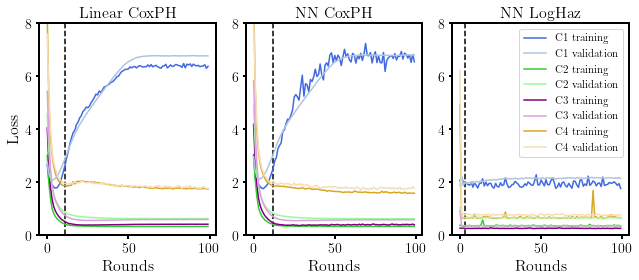

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(9,4))    

ax1label = ax[0].set_ylabel('Loss', fontsize=16)

case = 'noniid'

for j, col in enumerate(ax):
    for axis in ['top','bottom','left','right']:
        col.spines[axis].set_linewidth(2)

    idx = index_dict[model_type[j]]
    adj = 5 
    print(avg_rounds[idx+adj])
    col.axvline(x=avg_rounds[idx+adj], linestyle='dashed',color='black')

    filename = f'{path}/{what}_val_loss_M{model_type[j]}C{case}L{local_epochs}.npy'
    losses = np.load(filename)
    if flatten:
        mean = losses.mean(axis=0).mean(axis=0)
        std = losses.std(axis=0).mean(axis=0)
    else:
        mean = losses.mean(axis=0)
        std = losses.std(axis=0)
    color=['royalblue','limegreen','purple','goldenrod']
    lines = []
    if what == 'local' and not flatten:
        for i,m in enumerate(mean):
            line, = col.plot(range(100),m, color=color[i])
            lines.append(line)
            col.fill_between(range(100), m - std[i], m + std[i], alpha=0, color=color[i])
    else:
        col.plot(range(100),mean, color=color[0])
        col.fill_between(range(100), mean - std, mean + std, alpha=0.5, color=color[0])

    # plt.plot(mean, range(100))

    # plt.fill_between(range(100), mean - std, mean + std)
    filename = f'{path}/{what}_train_loss_M{model_type[j]}C{case}L{local_epochs}.npy'
    losses = np.load(filename)

    if flatten:
        mean = losses.mean(axis=0).mean(axis=0)
        std = losses.std(axis=0).mean(axis=0)
    else:
        mean = losses.mean(axis=0)
        std = losses.std(axis=0)
        
    color=['lightsteelblue','palegreen','plum','wheat']
    if what == 'local' and not flatten:
        for i,m in enumerate(mean):
            line, = col.plot(range(100),m, color[i])
            lines.append(line)
            col.fill_between(range(100), m - std[i], m + std[i], alpha=0, color=color[i])
    else:
        col.plot(range(100),mean, color[0])
        col.fill_between(range(100), mean - std, mean + std, alpha=0.5, color=color[0])

    col.tick_params(axis='x', labelsize=14)
    col.tick_params(axis='y', labelsize=14)

    # col.set_xticklabels([i * 25 for i in range(3)],fontsize=14)
    # col.set_yticklabels(fontsize=14)
    col.xaxis.set_tick_params(width=2)
    col.yaxis.set_tick_params(width=2)

    x1,x2,y1,y2 = col.axis()  
    col.axis((x1,x2,0,8))
    col.set_title(model_label[model_type[j]], fontsize=16)
    if j == 2:
        interleave = []
        for i in range(len(lines)//2):
            interleave.append(lines[i])
            interleave.append(lines[i+len(lines)//2])
            # legend = ['C1 training', 'C2 training','C3 training','C4 training','C1 val', 'C2 val','C3 val','C4 val']
            legend = ['C1 training','C1 validation', 'C2 training','C2 validation', 'C3 training','C3 validation','C4 training','C4 validation']

        col.legend(interleave,legend,loc='upper right', fontsize=11)           
    col.set_xlabel('Rounds',fontsize=16)
plt.tight_layout()
plt.savefig('../figs/onerow_losses.eps', format='eps')

In [16]:
# path = '../losses'
# model_type = 'NNnph'
# case = 'noniid'
# local_epochs = 1
# what = 'local'

# filename = f'{path}/{what}_val_loss_M{model_type}C{case}L{local_epochs}.npy'
# losses = np.load(filename)
# mean = losses.mean(axis=0).mean(axis=0)
# std = losses.std(axis=0).mean(axis=0)
# color=['royalblue','limegreen','purple','goldenrod']

# plt.plot(range(100),mean, color=color[0])
# plt.fill_between(range(100), mean - std, mean + std, alpha=0.5, color=color[0])

# # plt.plot(mean, range(100))

# # plt.fill_between(range(100), mean - std, mean + std)

# filename = f'{path}/{what}_train_loss_M{model_type}C{case}L{local_epochs}.npy'
# losses = np.load(filename)

# mean = losses.mean(axis=0).mean(axis=0)
# std = losses.std(axis=0).mean(axis=0)
# color=['lightsteelblue','palegreen','plum','wheat']

# plt.plot(range(100),mean, color[0])
# plt.fill_between(range(100), mean - std, mean + std, alpha=0.5, color=color[0])

# x1,x2,y1,y2 = plt.axis()  
# plt.axis((x1,x2,0,5))
# # # plt.legend(['a','b','c','d'])